In [2]:
import geojson
import shapely
import stageemi
import stageemi.dev.visu as dev
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import stageemi.dev.decorator_map as dm
import ipywidgets as widg 
import ipyleaflet as ipyl
import datetime as dt
import os 
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl
import pandas 
import glob

In [12]:
path="..\\..\\..\\WWMF\\"
date = "20200126"
file=sorted(glob.glob(path+"*"+date+'000000'+"*"))[0]

da_ww=xr.open_dataarray(file)
da_ww['latitude']=da_ww['latitude'].round(5)

In [7]:
zone_dpt=['FRJ13','FRB05','FRH02','FRK24']

In [10]:
dir_fig = 'C:\\Users\\mary\\Desktop\\stageemi\\figures\\'

In [14]:
fig,axes = plt.subplots(nrows=2,ncols = 2,figsize=(15,10))
ax = axes.flat

for izone, zone in enumerate(zone_dpt):
#     da_mask=xr.open_dataarray("../GeoData/nc_departement/"+zone+".nc")
    da_mask=xr.open_dataarray("..\\..\\GeoData\\nc_departement\\"+zone+".nc")

    da_mask["latitude"]=da_mask["latitude"].round(5)
    da=(da_mask * da_ww).squeeze("id")
    da.values[np.isnan(da.values)]=-100
    weather_type="da.values>72"
    ind=np.where(eval(weather_type))
    n, bins, patches=ax[izone].hist(ind[2],np.arange(0,48,1),color='r')
    ax[izone].set_title(zone+" - Echeances: "+str(np.argsort(n)[::-1][0:5]),fontsize=15)
    ax[izone].legend(["weather type"+weather_type.split("values")[1]],fontsize=15)
# plt.tight_layout()
fig.savefig(dir_fig + 'critical_situations_'+date+'.png',dpi=400)
plt.clf()
plt.close('all')

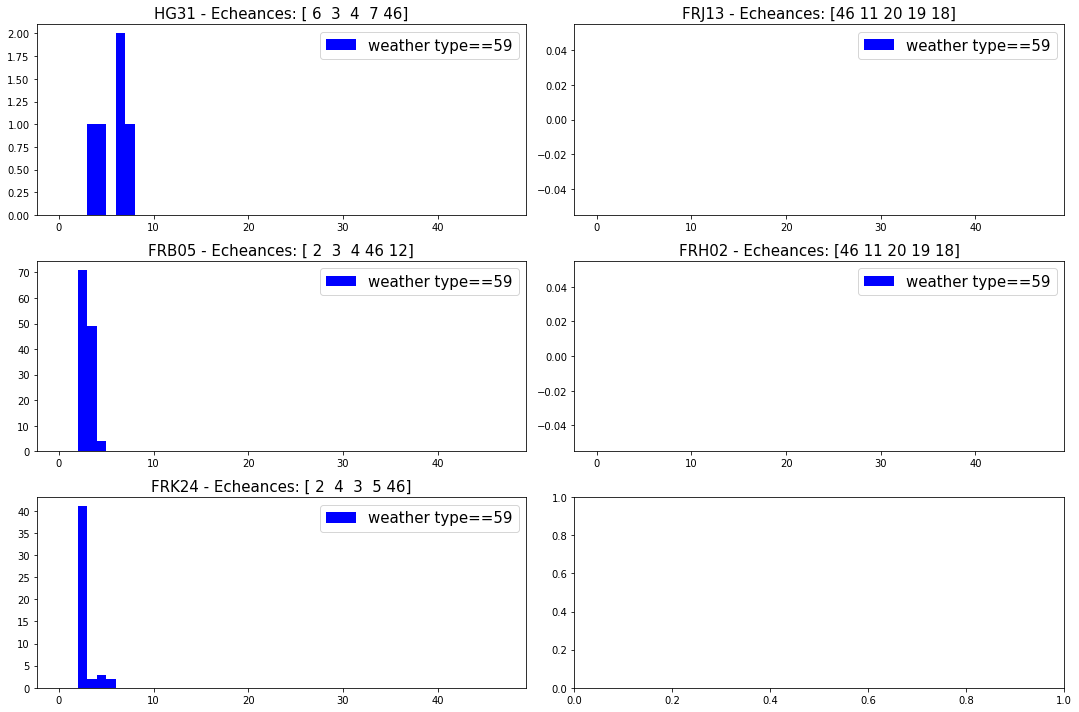

In [7]:
fig,axes = plt.subplots(nrows=3,ncols = 2,figsize=(15,10))
ax = axes.flat

for izone, zone in enumerate(zone_dpt):
    da_mask=xr.open_dataarray("../GeoData/nc_departement/"+zone+".nc")
    da_mask["latitude"]=da_mask["latitude"].round(5)
    da=(da_mask * da_ww).squeeze("id")
    da.values[np.isnan(da.values)]=-100
    weather_type="da.values==59"
    ind=np.where(eval(weather_type))
    n, bins, patches=ax[izone].hist(ind[2],np.arange(0,48,1),color='b')
    ax[izone].set_title(zone+" - Echeances: "+str(np.argsort(n)[::-1][0:5]),fontsize=15)
    ax[izone].legend(["weather type"+weather_type.split("values")[1]],fontsize=15)
plt.tight_layout()

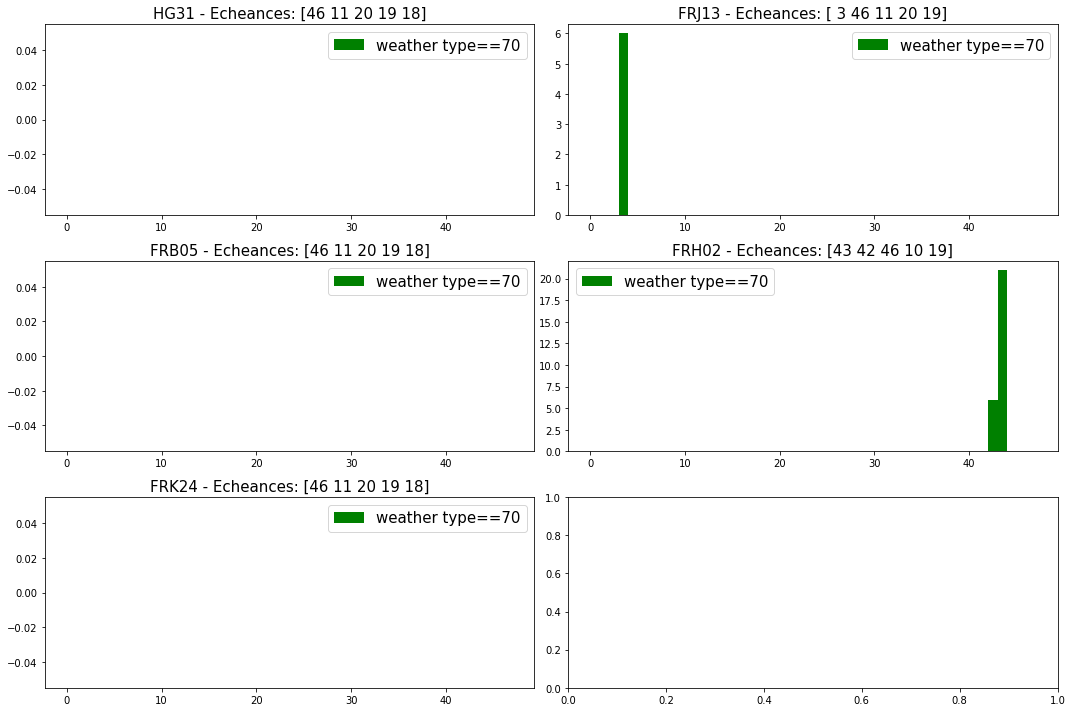

In [6]:
fig,axes = plt.subplots(nrows=3,ncols = 2,figsize=(15,10))
ax = axes.flat

for izone, zone in enumerate(zone_dpt):
    da_mask=xr.open_dataarray("../GeoData/nc_departement/"+zone+".nc")
    da_mask["latitude"]=da_mask["latitude"].round(5)
    da=(da_mask * da_ww).squeeze("id")
    da.values[np.isnan(da.values)]=-100
    weather_type="da.values==70"
    ind=np.where(eval(weather_type))
    n, bins, patches=ax[izone].hist(ind[2],np.arange(0,48,1),color='g')
    ax[izone].set_title(zone+" - Echeances: "+str(np.argsort(n)[::-1][0:5]),fontsize=15)
    ax[izone].legend(["weather type"+weather_type.split("values")[1]],fontsize=15)
plt.tight_layout()